<a href="https://colab.research.google.com/github/OzUygur/muon_scattering_tomography/blob/main/SI_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/CSV/analiz_nt_Data2.csv')
df.head()

,X1,Y1,Z1,E1,X2,Y2,Z2,E2,X3,Y3,Z3,E3,X4,Y4,Z4,E4,X0,Y0,Z0,E0
0,0.0000,0.0000,0.0000,0.000000,0.0000,0.00000,0.0000,0.000000,129.343,62.5019,370.000,0.997197,143.157,77.5161,390.000,0.996125,0,0,0,0
1,-243.8790,128.7880,50.1101,0.498325,-260.8850,121.14900,70.0575,0.496522,0.000,0.0000,0.000,0.000000,0.000,0.0000,0.000,0.000000,0,0,0,0
2,0.0000,0.0000,0.0000,0.000000,0.0000,0.00000,0.0000,0.000000,-277.844,-126.6520,370.397,0.136051,-278.812,-124.4770,390.377,0.134718,0,0,0,0
3,36.7288,10.3830,50.0000,3.051040,29.8382,-2.23936,70.0000,3.050050,0.000,0.0000,0.000,0.000000,0.000,0.0000,0.000,0.000000,0,0,0,0
4,-170.3750,70.1949,50.0000,2.915680,-200.7340,70.94510,70.4783,2.912070,0.000,0.0000,0.000,0.000000,0.000,0.0000,0.000,0.000000,0,0,0,0


In [ ]:
import math
import time
import pandas as pd

def POCA(row):
    X1, X2, X3, X4 = row['X1'], row['X2'], row['X3'], row['X4']
    Y1, Y2, Y3, Y4 = row['Y1'], row['Y2'], row['Y3'], row['Y4']
    Z1, Z2, Z3, Z4 = row['Z1'], row['Z2'], row['Z3'], row['Z4']

    clock_start = time.time()

    # Calculate position
    u1 = [X2 - X1, Y2 - Y1, Z2 - Z1]
    u2 = [X4 - X3, Y4 - Y3, Z4 - Z3]
    w = [-(X3 - X1), -(Y3 - Y1), -(Z3 - Z1)]

    u1DOTu1 = sum(ui**2 for ui in u1)
    u2DOTu2 = sum(ui**2 for ui in u2)
    u1DOTu2 = sum(u1[i] * u2[i] for i in range(3))
    u1DOTw = sum(u1[i] * w[i] for i in range(3))
    u2DOTw = sum(u2[i] * w[i] for i in range(3))

    a = u1DOTu1
    b = u1DOTu2
    c = u2DOTu2

    d = u1DOTw
    e = u2DOTw
    delta = a * c - b * b

    if delta == 0:
        # Handle the case when delta is zero
        # For example, return default values or skip the calculation
        return pd.Series([0, 0, 0, 0, 0])

    t1 = (b * e - c * d) / delta
    t2 = (a * e - b * d) / delta

    P01 = [X1, Y1, Z1]
    P02 = [X3, Y3, Z3]

    P1 = [(P01[i] + t1 * u1[i]) for i in range(3)]
    P2 = [(P02[i] + t2 * u2[i]) for i in range(3)]
    POCA = [(P1[i] + P2[i]) / 2 for i in range(3)]

    L1 = math.sqrt(sum(ui**2 for ui in u1))
    L2 = math.sqrt(sum(ui**2 for ui in u2))

    X = POCA[0]
    Y = POCA[1]
    Z = POCA[2]

   # Calculate Theta
    Theta1 = math.atan((Z3 - Z2)/(2*X - (X2 + X3)))
    Theta2 = math.atan((Z3 - Z2)/(2*Y - (Y2 + Y3)))
    Theta = (Theta2 + Theta1)/2


    clock_end = time.time()
    time_elapsed = 1000 * (clock_end - clock_start)
    CPU_Time = time_elapsed

    return pd.Series([X, Y, Z, Theta, CPU_Time])

df[['X_poca', 'Y_poca', 'Z_poca', 'Theta_poca', 'cpu_poca']] = df.apply(POCA, axis=1)
df.dropna(inplace=True)
df.head()

<ipython-input-3-2613960b9215>:54: RuntimeWarning: invalid value encountered in scalar divide
  Theta = math.atan((Y3 - Y)/(X3 - X)) - math.atan((Y - Y2)/(X - X2))


,X1,Y1,Z1,E1,X2,Y2,Z2,E2,X3,Y3,...,E4,X0,Y0,Z0,E0,X_POCA,Y_POCA,Z_POCA,Theta_POCA,cpu_POCA
0,0.0000,0.0000,0.0000,0.000000,0.0000,0.00000,0.0000,0.000000,129.343,62.5019,...,0.996125,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,-243.8790,128.7880,50.1101,0.498325,-260.8850,121.14900,70.0575,0.496522,0.000,0.0000,...,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,0.0000,0.0000,0.0000,0.000000,0.0000,0.00000,0.0000,0.000000,-277.844,-126.6520,...,0.134718,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,36.7288,10.3830,50.0000,3.051040,29.8382,-2.23936,70.0000,3.050050,0.000,0.0000,...,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,-170.3750,70.1949,50.0000,2.915680,-200.7340,70.94510,70.4783,2.912070,0.000,0.0000,...,0.000000,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import math
import time
import pandas as pd

def SI(row):
    X1, X2, X3, X4 = row['X1'], row['X2'], row['X3'], row['X4']
    Y1, Y2, Y3, Y4 = row['Y1'], row['Y2'], row['Y3'], row['Y4']
    Z1, Z2, Z3, Z4 = row['Z1'], row['Z2'], row['Z3'], row['Z4']

    clock_start = time.time()
    # XY Plane (a b)
    a1 = (Y2-Y1)/(X2-X1)
    b1 = (Y1*X2-X1*Y2)/(X2-X1)
    a2 = (Y4-Y3)/(X4-X3)
    b2 = (Y3*X4-X3*Y4)/(X4-X3)
    posX_xy = (b2-b1)/(a1-a2)
    posY_xy = (a1*b2-a2*b1)/(a1-a2)

      # ZX Plane (c d)
    c1=(X2-X1)/(Z2-Z1)
    d1=(X1*Z2-X2*Z1)/(Z2-Z1)
    c2=(X4-X3)/(Z4-Z3)
    d2=(X3*Z4-X4*Z3)/(Z4-Z3)
    posX_zx = (c1*d2-c2*d1)/(c1-c2)
    posZ_zx = (d2-d1)/(c1-c2)

    # YZ Plane (e f)
    e1=(Z2-Z1)/(Y2-Y1)
    f1=(Z1*Y2-Z2*Y1)/(Y2-Y1)
    e2=(Z4-Z3)/(Y4-Y3)
    f2=(Z3*Y4-Z4*Y3)/(Y4-Y3)
    posY_yz = (f2-f1)/(e1-e2)
    posZ_yz= (f2*e1-f1*e2)/(e1-e2)

    wx = (X2-X1)
    wy = (Y2-Y1)
    wz = (Z2-Z1)

    X  =  (posX_xy*wx + posX_zx*wz)/(wx + wz)
    Y  =  (posY_xy*wy + posY_yz*wz)/(wy + wz)
    Z  =  (posZ_yz*wz + posZ_zx*wx)/(wz + wx)

     # Calculate Theta
    Theta1 = math.atan((Z3 - Z2)/(2*X - (X2 + X3)))
    Theta2 = math.atan((Z3 - Z2)/(2*Y - (Y2 + Y3)))
    Theta = (Theta2 + Theta1)/2

    clock_end = time.time()
    time_elapsed = 1000 * (clock_end - clock_start)
    CPU_Time = time_elapsed

    return pd.Series([X, Y, Z, Theta, CPU_Time])

df[['X_si', 'Y_si', 'Z_si', 'Theta_si', 'cpu_si']] = df.apply(SI, axis=1)
df.dropna(inplace=True)
df.head()


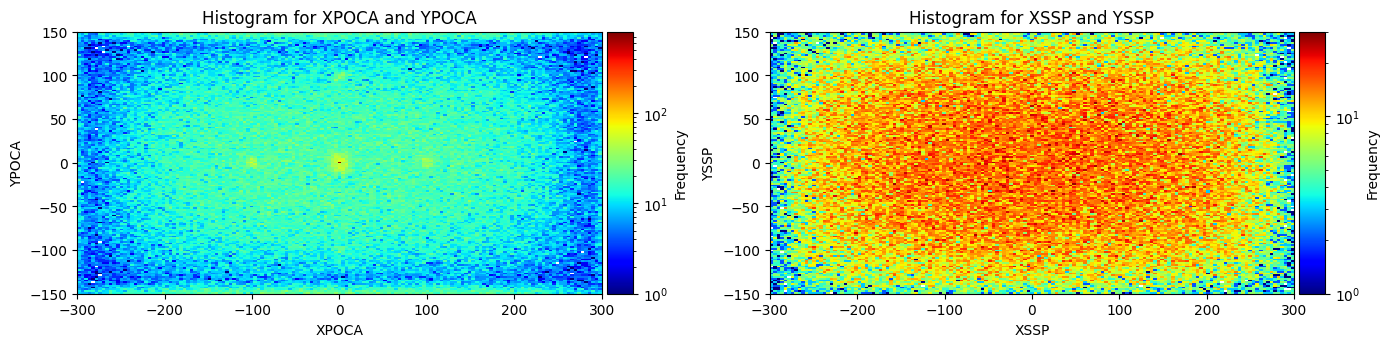

In [ ]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import LogNorm

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define bin edges for x and y axes
bins_x = np.linspace(-300, 300, 150)
bins_y = np.linspace(-150, 150, 150)

# Plot the first histogram for Xpoca and Ypoca
hist1 = axes[0].hist2d(-df['X_poca'], df['Y_poca'], bins=[bins_x, bins_y], cmap='jet', norm=LogNorm())
axes[0].set_title('Histogram for Xpoca and Ypoca')
axes[0].set_xlabel('Xpoca')
axes[0].set_ylabel('Ypoca')
axes[0].set_aspect('equal')  # Set aspect ratio to equal for a square plot
axes[0].grid(False)

# Plot the second histogram for Xssp and Yssp
hist2 = axes[1].hist2d(-df['X_si'], df['Y_si'], bins=[bins_x, bins_y], cmap='jet', norm=LogNorm())
axes[1].set_title('Histogram for Xsi and Ysi')
axes[1].set_xlabel('Xsi')
axes[1].set_ylabel('Ysi')
axes[1].set_aspect('equal')  # Set aspect ratio to equal for a square plot
axes[1].grid(False)


# Create colorbars
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cb1 = plt.colorbar(hist1[3], cax=cax1, label='Frequency')

divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cb2 = plt.colorbar(hist2[3], cax=cax2, label='Frequency')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [ ]:
# Define your threshold value
dE = df['E2'] - df['E3']
std_dE = np.std(dE)
mean_dE = np.mean(dE)

# Drop rows where dE is greater than the threshold value
df = df[dE > mean_dE]

# Display the filtered dataframe
df
print(std_dE)

2.111517376825561


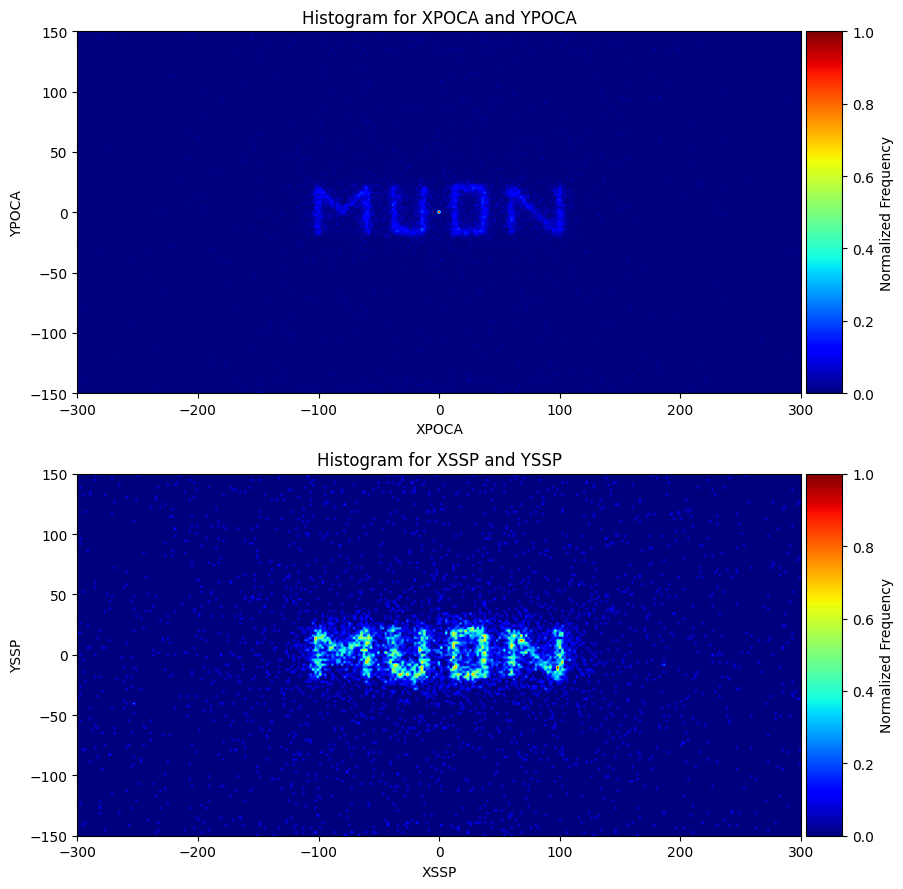

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.colors import Normalize

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Define bin edges for x and y axes
bins_x = np.linspace(-300, 300, 50)
bins_y = np.linspace(-150, 150, 50)

# Calculate the histograms
hist1_data, xedges, yedges = np.histogram2d(-df['X_poca'], df['Y_poca'], bins=[bins_x, bins_y], density=True)
hist2_data, xedges, yedges = np.histogram2d(-df['X_si'], df['Y_si'], bins=[bins_x, bins_y], density=True)

# Normalize the histograms
hist1_data /= hist1_data.max()
hist2_data /= hist2_data.max()

# Plot the first histogram for Xpoca and Ypoca
hist1 = axes[0].imshow(hist1_data.T, origin='lower', cmap='jet', norm=Normalize(vmin=0, vmax=1), extent=[-300, 300, -150, 150], aspect='')
axes[0].set_title('Histogram for Xpoca and Ypoca')
axes[0].set_xlabel('Xpoca')
axes[0].set_ylabel('Ypoca')
axes[0].set_aspect('equal')
axes[0].grid(False)

# Plot the second histogram for Xssp and Yssp
hist2 = axes[1].imshow(hist2_data.T, origin='lower', cmap='jet', norm=Normalize(vmin=0, vmax=1), extent=[-300, 300, -150, 150], aspect='')
axes[1].set_title('Histogram for Xssp and Yssp')
axes[1].set_xlabel('Xssp')
axes[1].set_ylabel('Yssp')
axes[1].set_aspect('equal')
axes[1].grid(False)


# Create colorbars
divider1 = make_axes_locatable(axes[0])
cax1 = divider1.append_axes("right", size="5%", pad=0.05)
cb1 = plt.colorbar(hist1, cax=cax1, label='Normalized Frequency')

divider2 = make_axes_locatable(axes[1])
cax2 = divider2.append_axes("right", size="5%", pad=0.05)
cb2 = plt.colorbar(hist2, cax=cax2, label='Normalized Frequency')



# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


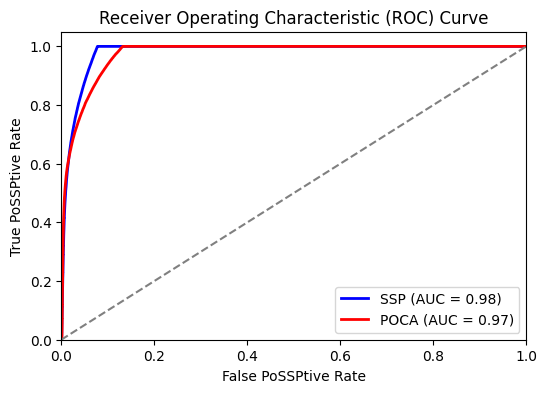

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Define your threshold value
threshold = 0.05

# Create binary labels based on the threshold for Theta_ssp and Theta_poca
df['True_Label'] = ((abs(df['Theta_si']) >= threshold) & (abs(df['Theta_poca']) >= threshold)).astype(int)

# Compute ROC curve for Theta_ssp
fpr_ssp, tpr_ssp, _ = roc_curve(df['True_Label'], abs(df['Theta_si']))
roc_auc_ssp = auc(fpr_ssp, tpr_ssp)

# Compute ROC curve for Theta_poca
fpr_poca, tpr_poca, _ = roc_curve(df['True_Label'], abs(df['Theta_poca']))
roc_auc_poca = auc(fpr_poca, tpr_poca)

# Plot ROC curves
plt.figure(figsize=(6, 4))
plt.plot(fpr_ssp, tpr_ssp, color='blue', lw=2, linestyle='-', label=f'SSP (AUC = {roc_auc_ssp:.2f})')
plt.plot(fpr_poca, tpr_poca, color='red', lw=2, linestyle='-', label=f'POCA (AUC = {roc_auc_poca:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


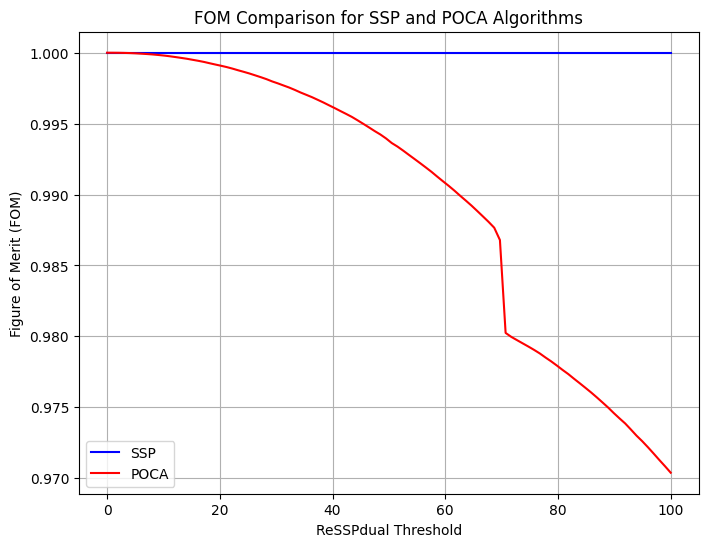

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the actual data
# Calculate residuals
residuals_ssp = df['Z0'] - df['Z_si']
residuals_poca = df['Z0'] - df['Z_poca']

# Calculate the MSE for each algorithm
mse_ssp = np.mean(residuals_ssp ** 2)
mse_poca = np.mean(residuals_poca ** 2)

# Define the range for the residuals axis
residuals_min = 0 #min(residuals_ssp.min(), residuals_poca.min())
residuals_max = 50# max(residuals_ssp.max(), residuals_poca.max())

# Create an array of residuals
residuals_range = np.linspace(residuals_min, residuals_max, 100)

# Compute the Figure of Merit (FOM) using MSE
fom_ssp = [1 - (np.mean(residuals_ssp[abs(residuals_ssp) < residual] ** 2) / mse_ssp) for residual in residuals_range]
fom_poca = [1 - (np.mean(residuals_poca[abs(residuals_poca) < residual] ** 2) / mse_poca) for residual in residuals_range]

# Plotting
plt.figure(figsize=(7, 5))
plt.plot(residuals_range, fom_ssp, label='SSP', color='blue')
plt.plot(residuals_range, fom_poca, label='POCA', color='red')

# Adding labels and title
plt.xlabel('Residuals')
plt.ylabel('Figure of Merit (FOM)')
plt.title('Comparison of Figure of Merit (FOM) for SSP and POCA Algorithms')
plt.legend()

# Showing plot
#plt.grid(True)
plt.show()


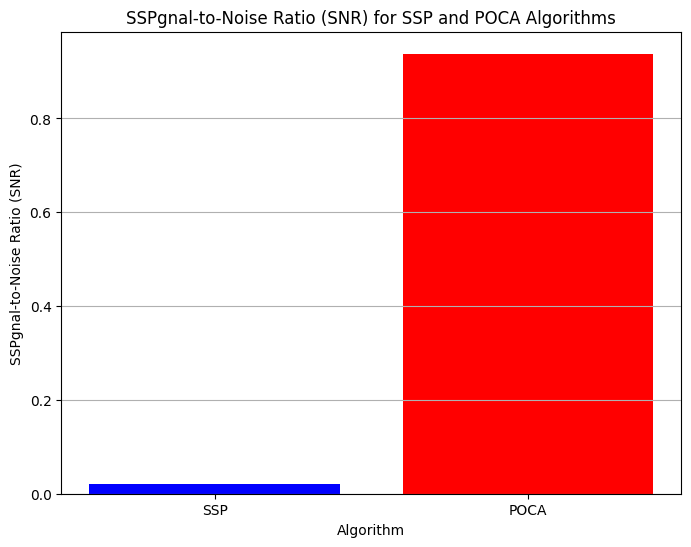

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the actual data
# Calculate residuals for SSP and POCA algorithms
residuals_ssp = df['X0'] - df['X_si']
residuals_poca = df['X0'] - df['X_poca']

# Calculate the mean and standard deviation of residuals for each algorithm
mean_residuals_ssp = np.mean(residuals_ssp)
std_residuals_ssp = np.std(residuals_ssp)
mean_residuals_poca = np.mean(residuals_poca)
std_residuals_poca = np.std(residuals_poca)

# Calculate the Signal-to-Noise Ratio (SNR) for each algorithm
snr_ssp = mean_residuals_ssp / std_residuals_ssp
snr_poca = mean_residuals_poca / std_residuals_poca

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(['SSP', 'POCA'], [snr_ssp, snr_poca], color=['blue', 'red'])
plt.xlabel('Algorithm')
plt.ylabel('Signal-to-Noise Ratio (SNR)')
plt.title('Signal-to-Noise Ratio (SNR) for SSP and POCA Algorithms')
plt.grid(axis='y')

# Showing plot
plt.show()


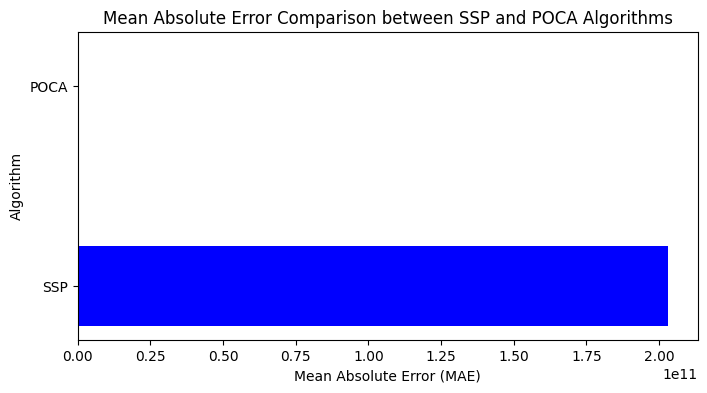

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the actual data
# Calculate absolute residuals for SSP and POCA algorithms
abs_residuals_ssp = abs(df['X0'] - df['X_si'])
abs_residuals_poca = abs(df['X0'] - df['X_poca'])

# Calculate the Mean Absolute Error (MAE) for each algorithm
mae_ssp = np.mean(abs_residuals_ssp)
mae_poca = np.mean(abs_residuals_poca)

# Set the height of the bars
bar_height = 0.4

# Create horizontal bar plot
plt.figure(figsize=(8, 4))
plt.barh(['SSP', 'POCA'], [mae_ssp, mae_poca], height=bar_height, color=['blue', 'red'])

# Adding labels and title
plt.xlabel('Mean Absolute Error (MAE)')
plt.ylabel('Algorithm')
plt.title('Mean Absolute Error Comparison between SSP and POCA Algorithms')

# Showing plot
#plt.grid(axis='x')
plt.show()


<Figure size 600x400 with 0 Axes>

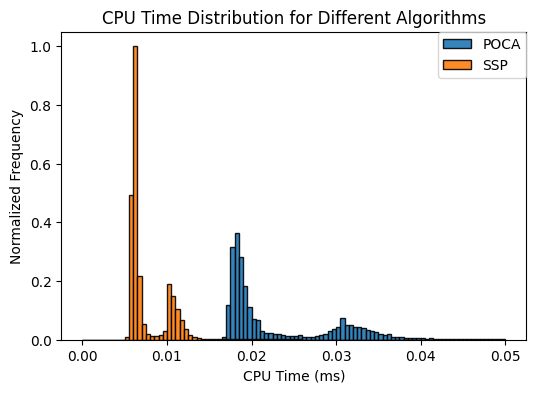

In [ ]:
import matplotlib.pyplot as plt

# CPU times for each algorithm
poca_cpu_times = df['cpu_poca']
ssp_cpu_times = df['cpu_si']

# Define the range for CPU time axis
cpu_time_range = (0, 0.05)  # Adjust the range as needed

# Plot histograms for CPU times to find max value
plt.figure(figsize=(6, 4))

# Plot histograms for CPU times to find max value
hist_poca, bins_poca, _ = plt.hist(poca_cpu_times, bins=100, range=cpu_time_range, alpha=0.9, edgecolor='black')
hist_ssp, bins_ssp, _ = plt.hist(ssp_cpu_times, bins=100, range=cpu_time_range, alpha=0.9, edgecolor='black')

# Get the maximum y-value
max_y_value = max(hist_poca.max(), hist_ssp.max())

# Clear the plot to re-plot with normalized y-values
plt.clf()

# Plot normalized CPU times histogram with max y-value normalization
plt.figure(figsize=(6, 4))

# Plot histograms for normalized CPU times with max y-value normalization
plt.hist(poca_cpu_times, bins=100, range=cpu_time_range, label='POCA', alpha=0.9, edgecolor='black', weights=np.ones_like(poca_cpu_times) / max_y_value)
plt.hist(ssp_cpu_times, bins=100, range=cpu_time_range, label='SI', alpha=0.9, edgecolor='black', weights=np.ones_like(ssp_cpu_times) / max_y_value)

# Adding labels and title
plt.xlabel('CPU Time (ms)')
plt.ylabel('Normalized Frequency')
plt.title('CPU Time Distribution for Different Algorithms')
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0., fontsize='medium')

# Showing plot
#plt.grid(True)
plt.show()


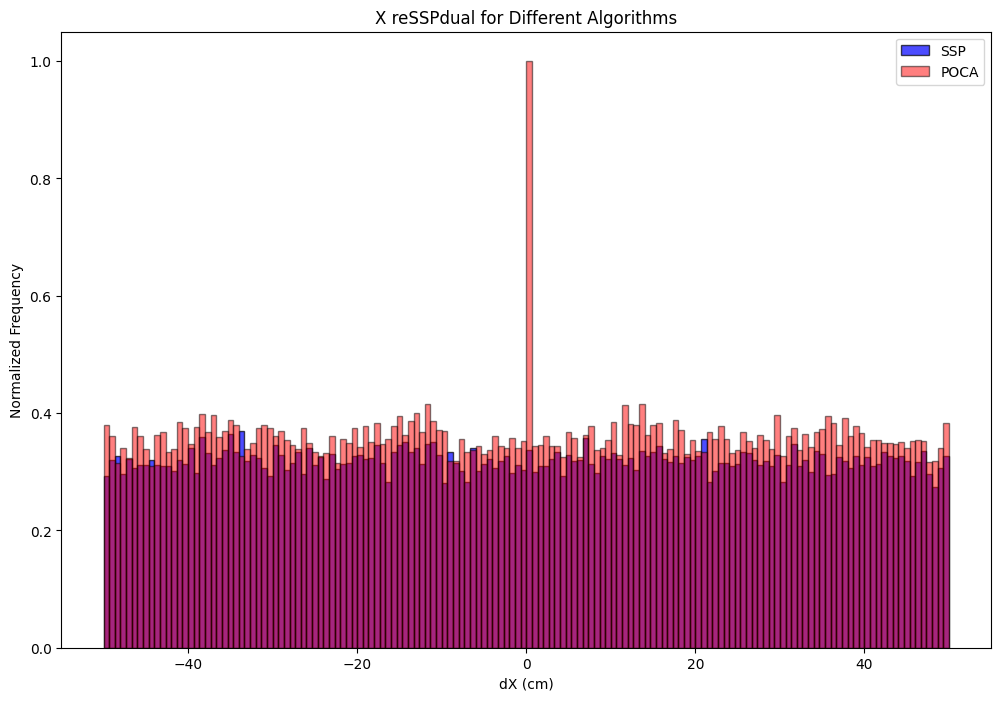

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Residuals for each algorithm
poca_z = df['Z_poca']
ssp_z = df['Z_si']

# Define the range for the residuals axis
z_range = (0, 100)  # Adjust the range as needed

# Compute histograms
hist_poca, bins_poca = np.histogram(poca_z, bins=150, range=z_range)
hist_ssp, bins_ssp = np.histogram(ssp_z, bins=150, range=z_range)

# Find the maximum value for normalization
max_y_value = max(hist_poca.max(), hist_ssp.max())

# Plotting
plt.figure(figsize=(12, 8))

# Plot normalized histograms for residuals
plt.hist(poca_z, bins=150, range=z_range, label='POCA', alpha=0.5, color='red', edgecolor='black', weights=np.ones_like(poca_z) / max_y_value)
plt.hist(ssp_z, bins=150, range=z_range, label='SSP', alpha=0.7, color='blue', edgecolor='black', weights=np.ones_like(ssp_z) / max_y_value)

# Adding labels and title
plt.xlabel('Z (cm)')
plt.ylabel('Normalized Frequency')
plt.title('Zpos for Different Algorithms')
plt.legend(loc='upper right')

# Showing plot
plt.grid(True)
plt.show()


<Figure size 600x400 with 0 Axes>

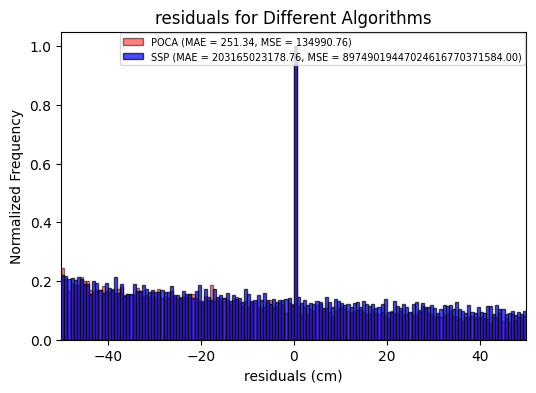

In [ ]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Calculate residuals
Residuals_ssp = df['X0'] - df['X_si']
Residuals_poca = df['X0'] - df['X_poca']

# Normalize the residuals
scaler = MinMaxScaler()
Residuals_ssp_normalized = scaler.fit_transform(Residuals_ssp.values.reshape(-1, 1)).flatten()
Residuals_poca_normalized = scaler.fit_transform(Residuals_poca.values.reshape(-1, 1)).flatten()

# Calculate MAE and MSE
mae_ssp = mean_absolute_error(df['Z0'], df['Z_si'])
mae_poca = mean_absolute_error(df['Z0'], df['Z_poca'])
mse_ssp = mean_squared_error(df['Z0'], df['Z_si'])
mse_poca = mean_squared_error(df['Z0'], df['Z_poca'])

# Plot the histograms to find the max y-value
plt.figure(figsize=(6, 4))

# Plot histograms for residuals to find max value
hist_ssp, bins_ssp, _ = plt.hist(Residuals_ssp, bins=150, range=(-50, 50), alpha=0.7)
hist_poca, bins_poca, _ = plt.hist(Residuals_poca, bins=150, range=(-50, 50), alpha=0.5)

# Get the maximum y-value
max_y_value = max(hist_ssp.max(), hist_poca.max())

# Clear the plot to re-plot with normalized y-values
plt.clf()

# Plot normalized residuals histogram with max y-value normalization
plt.figure(figsize=(6, 4))

# Plot histograms for normalized residuals with max y-value normalization
plt.hist(Residuals_poca, bins=150, range=(-50, 50), label=f'POCA (MAE = {mae_poca:.2f}, MSE = {mse_poca:.2f})', alpha=0.5, color='red', edgecolor='black', weights=np.ones_like(Residuals_poca) / max_y_value)
plt.hist(Residuals_ssp, bins=150, range=(-50, 50), label=f'SSP (MAE = {mae_ssp:.2f}, MSE = {mse_ssp:.2f})', alpha=0.7, color='blue', edgecolor='black', weights=np.ones_like(Residuals_ssp) / max_y_value)

# Adding labels and title
plt.xlabel('Residuals (cm)')
plt.ylabel('Normalized Frequency')
plt.title('Residuals for Different Algorithms')

# Customize the legend
plt.legend(loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0.1, fontsize= 7)

# Set the range for x-axis
plt.xlim(-50, 50)

# Showing plot
#plt.grid(True)
plt.show()


In [ ]:

Ax = (X2 - X1) / (Z2 - Z1)
Bx = (Z2*X1 - Z1*X2) / (Z2 - Z1)
Cx = (X4 - X3) / (Z4 - Z3)
Dx = (Z4*X3 - Z3*X4) / (Z4 - Z3)
#YZ
Ay = (Y2 - Y1) / (Z2 - Z1)
By = (Z2*Y1 - Z1*Y2) / (Z2 - Z1)
Cy = (Y4 - Y3) / (Z4 - Z3)
Dy = (Z4*Y3 - Z3*Y4) / (Z4 - Z3)

z1 = (Dx - Bx)/(Ax - Cx)
z2 = (Dy - By)/(Ay - Cy)
Z = (z1 + z2)/2

Z0 = (Z2 + Z3)/2
eps = Z - Z0
X2_prime = Ax*(Z2 + 2*eps) + Bx
Y2_prime = Ay*(Z2 + 2*eps) + By

X = (X1 + X2_prime)/2
Y = (Y1 + Y2_prime)/2

NameError: name 'X2' is not defined

In [ ]:
import math
import time

def mat_mult(A, B):
    result = [0, 0, 0]
    for i in range(3):
        for j in range(2):
            result[i] += A[i][j] * B[j]
    return result

def transpose(A):
    At = [[0, 0, 0], [0, 0, 0]]
    for i in range(3):
        for j in range(2):
            At[j][i] = A[i][j]
    return At

def invert_2x2(A):
    det = A[0][0] * A[1][1] - A[0][1] * A[1][0]
    invA = [[A[1][1] / det, -A[0][1] / det], [-A[1][0] / det, A[0][0] / det]]
    return invA

def least_squares_method(X1, Y1, Z1, X2, Y2, Z2, X3, Y3, Z3, X4, Y4, Z4):
    clock_start = time.time()

    # Points for the first line
    P1 = [X1, Y1, Z1]
    P2 = [X2, Y2, Z2]

    # Points for the second line
    P3 = [X3, Y3, Z3]
    P4 = [X4, Y4, Z4]

    # Line direction vectors
    d1 = [P2[0] - P1[0], P2[1] - P1[1], P2[2] - P1[2]]
    d2 = [P4[0] - P3[0], P4[1] - P3[1], P4[2] - P3[2]]

    # Matrix for least squares
    A = [
        [d1[0], -d2[0]],
        [d1[1], -d2[1]],
        [d1[2], -d2[2]]
    ]

    At = transpose(A)

    AtA = [
        [At[0][0] * A[0][0] + At[0][1] * A[1][0] + At[0][2] * A[2][0], At[0][0] * A[0][1] + At[0][1] * A[1][1] + At[0][2] * A[2][1]],
        [At[1][0] * A[0][0] + At[1][1] * A[1][0] + At[1][2] * A[2][0], At[1][0] * A[0][1] + At[1][1] * A[1][1] + At[1][2] * A[2][1]]
    ]

    AtA_inv = invert_2x2(AtA)

    Atb = [
        At[0][0] * (P3[0] - P1[0]) + At[0][1] * (P3[1] - P1[1]) + At[0][2] * (P3[2] - P1[2]),
        At[1][0] * (P3[0] - P1[0]) + At[1][1] * (P3[1] - P1[1]) + At[1][2] * (P3[2] - P1[2])
    ]

    t_s = [
        AtA_inv[0][0] * Atb[0] + AtA_inv[0][1] * Atb[1],
        AtA_inv[1][0] * Atb[0] + AtA_inv[1][1] * Atb[1]
    ]

    t = t_s[0]
    s = t_s[1]

    # Find the points on the lines that are closest to each other
    closest_point_line1 = [P1[0] + t * d1[0], P1[1] + t * d1[1], P1[2] + t * d1[2]]
    closest_point_line2 = [P3[0] + s * d2[0], P3[1] + s * d2[1], P3[2] + s * d2[2]]

    # Compute the midpoint between the closest points on the lines
    X = (closest_point_line1[0] + closest_point_line2[0]) / 2
    Y = (closest_point_line1[1] + closest_point_line2[1]) / 2
    Z = (closest_point_line1[2] + closest_point_line2[2]) / 2

    # Calculate Theta
    Theta = math.atan2(Z3 - Z2, math.sqrt((X2 - X1) ** 2 + (Y2 - Y1) ** 2))

    clock_end = time.time()
    time_elapsed = 1000 * (clock_end - clock_start)
    CPU_Time = time_elapsed

    return pd.Series([X, Y, Z, Theta, CPU_Time])

df[['X_si', 'Y_si', 'Z_si', 'Theta_si', 'cpu_si']] = df.apply(POCA, axis=1)
df.dropna(inplace=True)
df.head()
